In [1]:
import numpy as np
import xarray as xr
import scipy.stats as stats
import pymannkendall as mk
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [2]:
## The script is used to reproduce: 
##         Fig. 2. Time series of amplitudes for zonal wavenumbers m = 6, 7, 8 individually and for the entire band 6–8 from 1950-2024.

# Define homepath
homepath = "/pscratch/sd/x/xueke/"

# Define periods
startyear = 1950
endyear = 2024
ERA5_yyrange = np.arange(startyear, endyear+1, 1)            # Full time interval: 1950-2024

# Plot settings
labelsize = 14
size = 16
colors1 = plt.cm.Oranges(np.linspace(0,1,5))
col_freq_wnr6  = colors1[1]
col_freq_wnr7 = colors1[2]
col_freq_wnr8 = colors1[3]

In [3]:
# Read netDCF file
dct_fp =  homepath + "data/era5_monthly_1.5deg_v300_1950_2024_JJAmean_37.5N-57.5N_delplev-dct.nc"

# Select data: m = 6, 7, 8
dct = xr.open_dataset(dct_fp)
dct_wnr6_temp = dct['ampm'].sel(intwavenr='6.0').to_dataframe().rename(columns={'ampm': 'ampm_wnr6'}).drop('intwavenr', axis=1).droplevel(1, axis=0)
dct_wnr7_temp = dct['ampm'].sel(intwavenr='7.0').to_dataframe().rename(columns={'ampm': 'ampm_wnr7'}).drop('intwavenr', axis=1).droplevel(1, axis=0)
dct_wnr8_temp = dct['ampm'].sel(intwavenr='8.0').to_dataframe().rename(columns={'ampm': 'ampm_wnr8'}).drop('intwavenr', axis=1).droplevel(1, axis=0)

dct_wnr6 = dct_wnr6_temp['ampm_wnr6'].values
dct_wnr7 = dct_wnr7_temp['ampm_wnr7'].values
dct_wnr8 = dct_wnr8_temp['ampm_wnr8'].values

# Calculate entire band 6–8
dct_wnr678 = np.sqrt(dct_wnr6**2 + dct_wnr7**2 + dct_wnr8**2)

## Trend calculation and significance test using linear least-squares regression & Mann-Kendall 

In [4]:
# Linear least squares regression (LSR)
slope_wnr6,intercept_wnr6,rVal_wnr6,p_wnr6,stderr_wnr6 = stats.linregress(ERA5_yyrange, dct_wnr6, alternative='greater') # alternative='two-sided'
trend_wnr6 = slope_wnr6 * ERA5_yyrange + intercept_wnr6
print("**************** Linear least squares regression ****************")
print("Wave 6")
print("slope: ", round(slope_wnr6, 3))
print("p-val: ", round(p_wnr6, 3))

slope_wnr7,intercept_wnr7,rVal_wnr7,p_wnr7,stderr_wnr7 = stats.linregress(ERA5_yyrange, dct_wnr7, alternative='greater') # alternative='two-sided'
trend_wnr7 = slope_wnr7 * ERA5_yyrange + intercept_wnr7
print("Wave 7")
print("slope: ", round(slope_wnr7, 3))
print("p-val: ", round(p_wnr7, 3))

slope_wnr8,intercept_wnr8,rVal_wnr8,p_wnr8,stderr_wnr8 = stats.linregress(ERA5_yyrange, dct_wnr8, alternative='greater') # alternative='two-sided'
trend_wnr8 = slope_wnr8 * ERA5_yyrange + intercept_wnr8
print("Wave 8")
print("slope: ", round(slope_wnr8, 3))
print("p-val: ", round(p_wnr8, 3))

a_wnr678, b_wnr678 = np.polyfit(ERA5_yyrange, dct_wnr678, 1)
slope_wnr678,intercept_wnr678,rVal_wnr678,p_wnr678,stderr_wnr678 = stats.linregress(ERA5_yyrange, dct_wnr678, alternative='greater') # alternative='two-sided'
trend_wnr678 = slope_wnr678 * ERA5_yyrange + intercept_wnr678
print("Waves 6-8")
print("slope: ", round(slope_wnr678, 3))
print("p-val: ", round(p_wnr678, 3))

# M-K test
p_wnr6_mk = mk.original_test(dct_wnr6).p
slope_wnr6_mk = mk.original_test(dct_wnr6).slope
intercept_wnr6_mk = mk.original_test(dct_wnr6).intercept
print("**************** M-K test ****************")
print("Wave 6")
print("slope: ", round(slope_wnr6_mk, 3))
print("p-val: ", round(p_wnr6_mk/2,3))

p_wnr7_mk = mk.original_test(dct_wnr7).p
slope_wnr7_mk = mk.original_test(dct_wnr7).slope
intercept_wnr7_mk = mk.original_test(dct_wnr7).intercept
print("Wave 7")
print("slope: ", round(slope_wnr7_mk, 3))
print("p-val: ", round(p_wnr7_mk/2,3))

p_wnr8_mk = mk.original_test(dct_wnr8).p
slope_wnr8_mk = mk.original_test(dct_wnr8).slope
intercept_wnr8_mk = mk.original_test(dct_wnr8).intercept
print("Wave 8")
print("slope: ", round(slope_wnr8_mk, 3))
print("p-val: ", round(p_wnr8_mk/2,3))

p_wnr678_mk = mk.original_test(dct_wnr678).p
slope_wnr678_mk = mk.original_test(dct_wnr678).slope
intercept_wnr678_mk = mk.original_test(dct_wnr678).intercept
print("Waves 6-8")
print("slope: ", round(slope_wnr678_mk, 3))
print("p-val: ", round(p_wnr678_mk/2,3))

**************** Linear least squares regression ****************
Wave 6
slope:  -0.002
p-val:  0.723
Wave 7
slope:  0.002
p-val:  0.271
Wave 8
slope:  0.003
p-val:  0.066
Waves 6-8
slope:  0.002
p-val:  0.321
**************** M-K test ****************
Wave 6
slope:  -0.003
p-val:  0.27
Wave 7
slope:  0.001
p-val:  0.311
Wave 8
slope:  0.003
p-val:  0.054
Waves 6-8
slope:  0.002
p-val:  0.317


## Plot

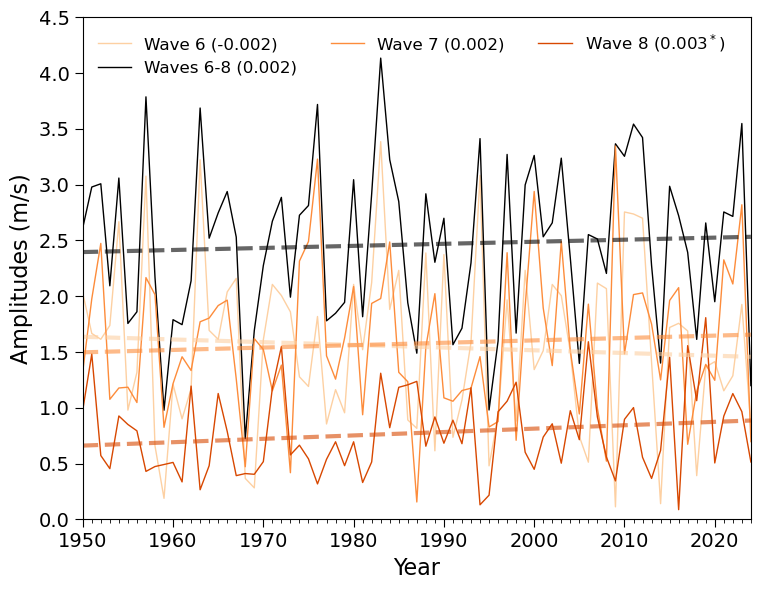

In [5]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)  

ax.plot(ERA5_yyrange, dct_wnr6, color=col_freq_wnr6, linewidth = 1, label='Wave 6 ('+str(round(slope_wnr6,3))+')')
ax.plot(ERA5_yyrange, dct_wnr678, color='black', linewidth = 1, label='Waves 6-8 ('+str(round(slope_wnr678,3))+')')
ax.plot(ERA5_yyrange, dct_wnr7, color=col_freq_wnr7, linewidth = 1, label='Wave 7 ('+str(round(slope_wnr7,3))+')')
ax.plot(ERA5_yyrange, dct_wnr8, color=col_freq_wnr8, linewidth = 1, label='Wave 8 ('+str(round(slope_wnr8,3))+'$^*$)')

ax.plot(ERA5_yyrange, trend_wnr6, color=col_freq_wnr6, linewidth = 3, linestyle='--', alpha=0.6)
ax.plot(ERA5_yyrange, trend_wnr7, color=col_freq_wnr7, linewidth = 3, linestyle='--', alpha=0.6)
ax.plot(ERA5_yyrange, trend_wnr8, color=col_freq_wnr8, linewidth = 3, linestyle='--', alpha=0.6)
ax.plot(ERA5_yyrange, trend_wnr678, color='black', linewidth = 3, linestyle='--', alpha=0.6)

# Plot settings
ax.tick_params('x',labelsize=labelsize)
ax.tick_params('y',labelsize=labelsize)
ax.tick_params(which='major', length=6) 
ax.tick_params(which='minor', length=3)
minor_locator = AutoMinorLocator(10)
ax.xaxis.set_minor_locator(minor_locator)
ax.set_xlabel('Year',size=size)
ax.set_ylabel('Amplitudes (m/s)',size=size)
ax.set_xlim([1950, 2024])
ax.set_ylim(0, 4.5)
ax.legend(loc="upper left", frameon=False, fontsize=labelsize-2, ncols=3)

fig.tight_layout()